# In this notebook:

## Creating linearly separable synthetic datasets

## Binary classification methods with 2 features for easy visualisation

- linear classification methods: logistic regression, SVM
- non-linear methods: polynomial SVM, RBF SVM

## Evaluating model performance:
- training/test set split,
- generalisation errors. cross-validation score
- metrics: accuracy, F1 measures, average_precision_score, AUC (using classification reports)

In [4]:
# Imports commonFunctions from github. 
## NOTE: THIS IS A SECURITY RISK IF YOU HAD TO DO THIS IN REAL LIFE
!pip install httpimport
import httpimport

path = 'https://raw.githubusercontent.com/PaoloMissier/DataScience-class-demos/master/CODE'
with httpimport.remote_repo(['commonFunctions'], path):
    from commonFunctions import *

## generate a " well-behaved", linearly separable dataset

####  try changing the separability of the two classes using:

`balanced` = False

`unbalance` > 0.1

In [53]:
X, CL = makeDataset(kind='classification', n_classes=2, sameScale = True, balanced = True, unbalance = 0.1,
                   n_clusters_per_class=2)


visualise the entire dataset 

<AxesSubplot:>

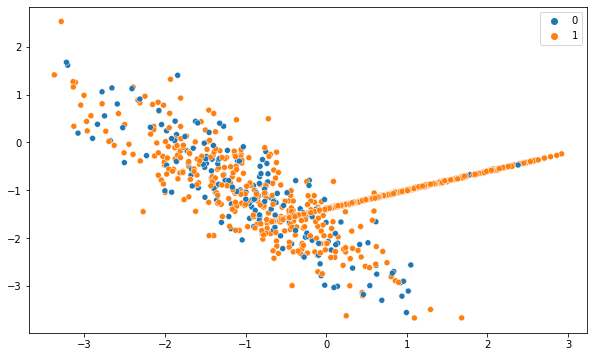

In [47]:
# plot entire X,Y
plt.figure(figsize=(10,6))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=CL)

## split the dataset into train vs test

In [48]:
XTrain, XTest, CLTrain, CLTest = train_test_split(X, CL, test_size = 0.33, random_state = 10)

## does the training set need scaling?

Use `StandardScaler` to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. If you want to see the negative effect not scaling your data can have, scikit-learn has a [section on the effects of not standardizing your data](
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py)

source: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [49]:
XTrain, XTest  = scale(XTrain, XTest)

<AxesSubplot:>

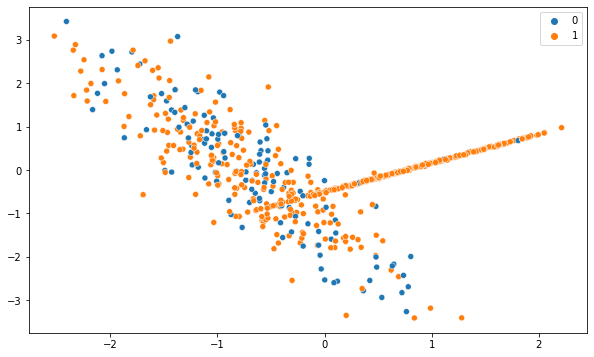

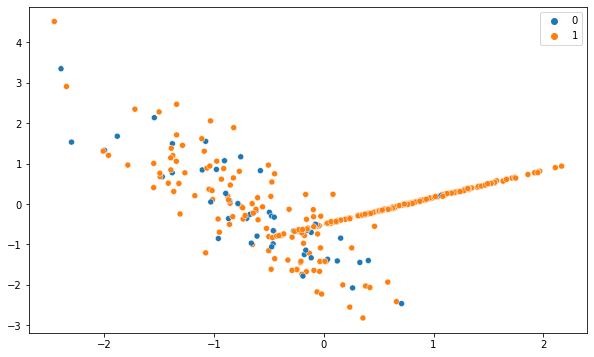

In [50]:
# plot entire X,Y for Train
plt.figure(figsize=(10,6))
sns.scatterplot(x=XTrain[:,0], y=XTrain[:,1], hue=CLTrain)

# plot entire X,Y for Test
plt.figure(figsize=(10,6))
sns.scatterplot(x=XTest[:,0], y=XTest[:,1], hue=CLTest)

## Logistic regression

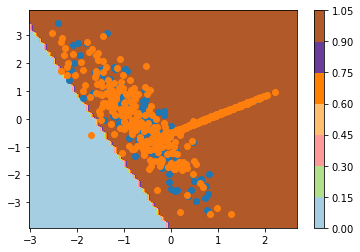

logit classification accuracy on training set: 0.80
logit classification accuracy on test set: 0.86
full classification report (on test set:)
              precision    recall  f1-score   support

           0       1.00      0.02      0.04        48
           1       0.86      1.00      0.92       282

    accuracy                           0.86       330
   macro avg       0.93      0.51      0.48       330
weighted avg       0.88      0.86      0.79       330

average precision score: 0.86
confusion matrix: 
 [[  1  47]
 [  0 282]]
tn: 1.00, fp: 47.000, fn: 0.00, tp: 282.00
using decision_function


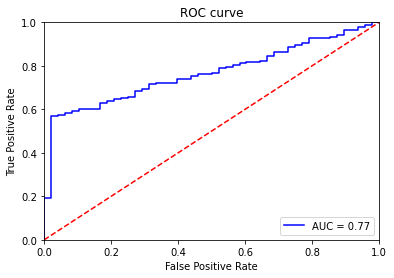

In [51]:
from sklearn.metrics import confusion_matrix

clf, CL_pred_Train, CL_pred_Test = logit(XTrain, CLTrain, XTest, CLTest)

# plotLinearFitTrainTest(clf, XTrain, CLTrain, XTest, CLTest)

plotContourFitTrainTestAlternate(clf, XTrain, CLTrain, XTest, CLTest, sharp=True)

evaluationReport(CLTrain, CL_pred_Train, CLTest, CL_pred_Test)

plotROC(clf, XTest, CLTest)


## SVM (linear)

logit classification accuracy on training set: 0.80
logit classification accuracy on test set: 0.85
full classification report (on test set:)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.85      1.00      0.92       282

    accuracy                           0.85       330
   macro avg       0.43      0.50      0.46       330
weighted avg       0.73      0.85      0.79       330

average precision score: 0.85
confusion matrix: 
 [[  0  48]
 [  0 282]]
tn: 0.00, fp: 48.000, fn: 0.00, tp: 282.00
using decision_function


/Users/npm65/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/npm65/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/npm65/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


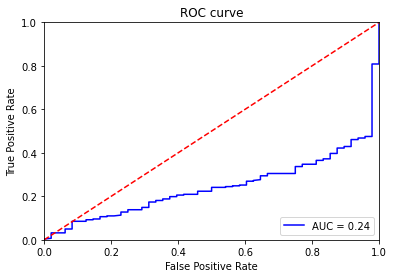

In [52]:
clf, CL_pred_Train, CL_pred_Test = LinearSVM(XTrain, CLTrain, XTest, CLTest)

#plotLinearFitTrainTest(clf, XTrain, CLTrain, XTest, CLTest)

# plotContourFitTrainTest(clf, XTrain, CLTrain, XTest, CLTest)

evaluationReport(CLTrain, CL_pred_Train, CLTest, CL_pred_Test)

plotROC(clf, XTest, CLTest)

## Decision trees

logit classification accuracy on training set: 0.88
logit classification accuracy on test set: 0.85
full classification report (on test set:)
              precision    recall  f1-score   support

           0       0.79      0.93      0.86       152
           1       0.93      0.79      0.85       178

    accuracy                           0.85       330
   macro avg       0.86      0.86      0.85       330
weighted avg       0.87      0.85      0.85       330

average precision score: 0.85
confusion matrix: 
 [[142  10]
 [ 38 140]]
tn: 142.00, fp: 10.000, fn: 38.00, tp: 140.00


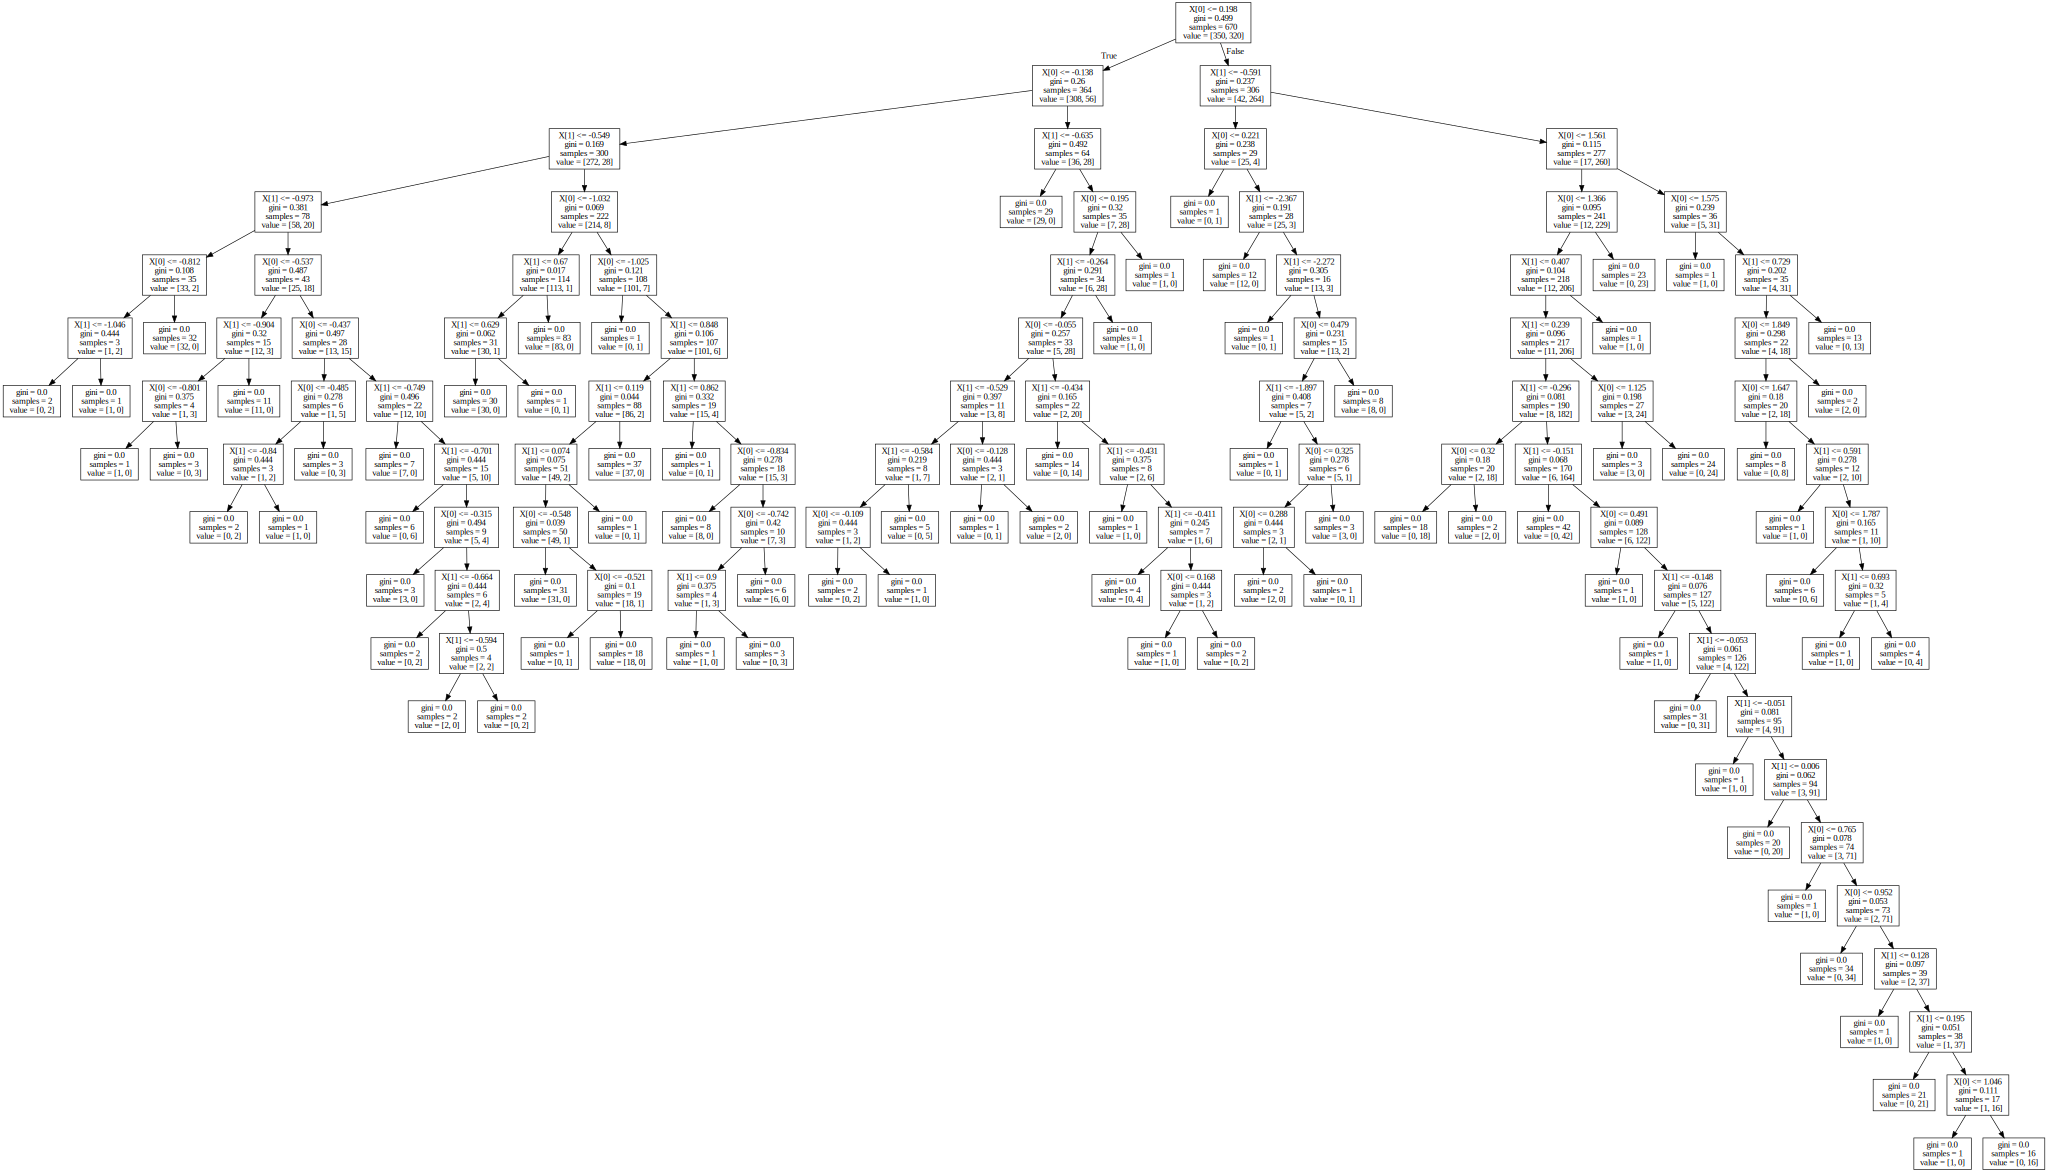

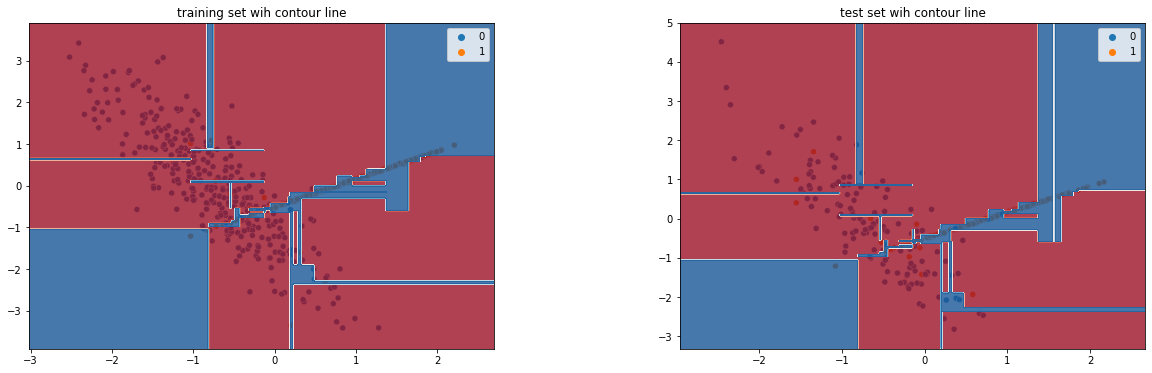

In [45]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(XTrain, CLTrain)

plotContourFitTrainTest(clf, XTrain, CLTrain, XTest, CLTest)

evaluationReport(CLTrain, CL_pred_Train, CLTest, CL_pred_Test)

dot = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot) 
graph